# Rice_Prediction_CNN_ReLU

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten
from keras.layers import LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping
import splitfolders

## Split_Folder

In [2]:
input_dir='D:\\DATA Science\\DEEP LEARNING\\CNN\\Rice_Prediction\\Data_set\\Rice_Image_Dataset'
output_dir='D:\\DATA Science\\DEEP LEARNING\\CNN\\Rice_Prediction\\Data_set\\Split_img'

In [3]:
#splitfolders.fixed(input=input_dir,output=output_dir,fixed=(500,100,100),seed=1337)

## Data Preparation

In [4]:
dataGen=ImageDataGenerator(rescale=1/255)

In [5]:
train_dir='D:\\DATA Science\\DEEP LEARNING\\CNN\\Rice_Prediction\\Data_set\\Split_img\\train'
test_dir='D:\\DATA Science\\DEEP LEARNING\\CNN\\Rice_Prediction\\Data_set\\Split_img\\test'
val_dir='D:\\DATA Science\\DEEP LEARNING\\CNN\\Rice_Prediction\\Data_set\\Split_img\\val'

In [6]:
train_itt=dataGen.flow_from_directory(directory=train_dir,batch_size=64,target_size=(100,100))
test_itt=dataGen.flow_from_directory(directory=test_dir,batch_size=64,target_size=(100,100))
val_itt=dataGen.flow_from_directory(directory=val_dir,batch_size=64,target_size=(100,100))

Found 2500 images belonging to 5 classes.
Found 500 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


## Model

In [7]:
model=Sequential()

In [8]:
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dense(5,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [9]:
early_stop= EarlyStopping(monitor='val_loss',patience=3,mode='min',verbose=False)

In [10]:
model.fit(train_itt,validation_data=val_itt,epochs=50,callbacks=early_stop)

Epoch 1/50
40/40 [==============================] - 38s 917ms/step - loss: 0.5266 - accuracy: 0.8168 - val_loss: 0.1973 - val_accuracy: 0.9380
Epoch 2/50
40/40 [==============================] - 41s 1s/step - loss: 0.1665 - accuracy: 0.9416 - val_loss: 0.1357 - val_accuracy: 0.9540
Epoch 3/50
40/40 [==============================] - 42s 1s/step - loss: 0.2034 - accuracy: 0.9276 - val_loss: 0.1339 - val_accuracy: 0.9540
Epoch 4/50
40/40 [==============================] - 40s 1s/step - loss: 0.1176 - accuracy: 0.9544 - val_loss: 0.1961 - val_accuracy: 0.9300
Epoch 5/50
40/40 [==============================] - 42s 1s/step - loss: 0.1271 - accuracy: 0.9596 - val_loss: 0.1101 - val_accuracy: 0.9600
Epoch 6/50
40/40 [==============================] - 46s 1s/step - loss: 0.0816 - accuracy: 0.9720 - val_loss: 0.1047 - val_accuracy: 0.9700
Epoch 7/50
40/40 [==============================] - 41s 1s/step - loss: 0.0818 - accuracy: 0.9752 - val_loss: 0.1167 - val_accuracy: 0.9640
Epoch 8/50
40/40 

<AxesSubplot:>

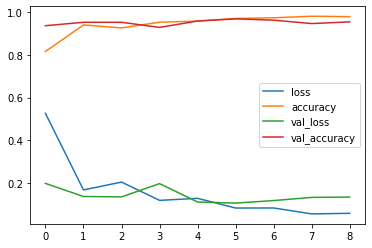

In [11]:
losses = pd.DataFrame(model.history.history)
losses.plot()

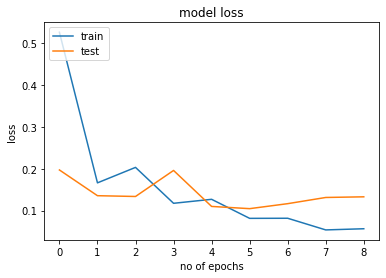

In [12]:
plt.plot(losses['loss'])
plt.plot(losses['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('no of epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

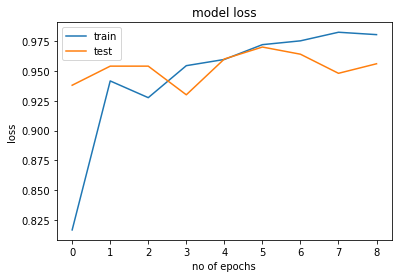

In [13]:
plt.plot(losses['accuracy'])
plt.plot(losses['val_accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('no of epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [14]:
#model.save('weather_classification_model.h5')

In [15]:
class_label= test_itt.class_indices
class_label

{'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}